## 10-4. CIFAR10 딥러닝 모델
---
CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링 되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.



![](/Users/jian/Desktop/aiffel_code/notebook/Projects/imgs/DHG/DHG_10.png)

### 데이터 로드 및 전처리
---
CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [42]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [43]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
from sklearn.utils import shuffle


(x_train_full, y_train_full),(x_test, y_test) = cifar10.load_data()
x_train, x_val ,  y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [44]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

/var/folders/96/sm2p62h1023c4ytkjcyhc9x40000gn/T/ipykernel_2927/2355943253.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


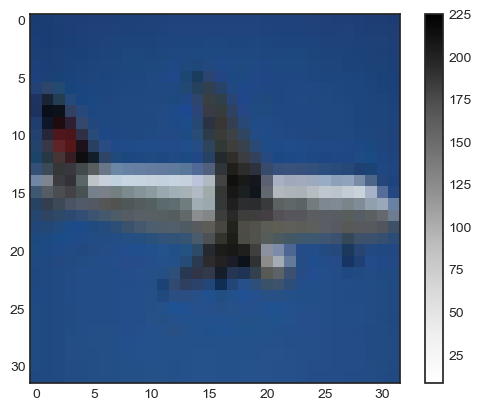

In [45]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [46]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [47]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(x_train.shape[0], -1) # 앞의 사이즈만 shape[0]대로 맞추고 나머지는 뭉쳐준다
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [48]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일
---
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [49]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.models import Model

input_layer = Input(shape=(3072,))


x = Dense(128)(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)


output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_16 (Dense)            (None, 128)               393344    
                                                                 
 batch_normalization_12 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 activation_12 (Activation)  (None, 128)               0         
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                           

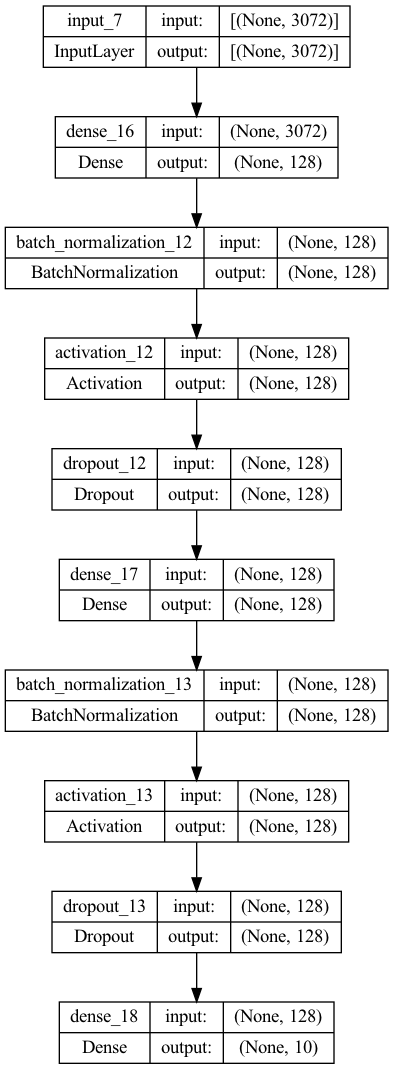

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### 모델 학습
---
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [51]:
x_train.shape

(40000, 3072)

In [52]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [53]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('reuters.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)

# 훈련 내역을 history에 저장
history = model.fit(x_train,y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb,early_stopping_cb])


Epoch 1/30
79/79 [==============================] - 3s 25ms/step - loss: 1.8537 - accuracy: 0.3432 - val_loss: 2.0354 - val_accuracy: 0.2816
Epoch 2/30
 9/79 [==>...........................] - ETA: 0s - loss: 1.6692 - accuracy: 0.4082

/Users/jian/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - 1s 16ms/step - loss: 1.6437 - accuracy: 0.4170 - val_loss: 2.1844 - val_accuracy: 0.2732
Epoch 3/30
79/79 [==============================] - 1s 17ms/step - loss: 1.5549 - accuracy: 0.4476 - val_loss: 2.6054 - val_accuracy: 0.2323
Epoch 4/30
79/79 [==============================] - 1s 17ms/step - loss: 1.5006 - accuracy: 0.4654 - val_loss: 1.9529 - val_accuracy: 0.3056
Epoch 5/30
79/79 [==============================] - 1s 16ms/step - loss: 1.4524 - accuracy: 0.4820 - val_loss: 2.1207 - val_accuracy: 0.2889
Epoch 6/30
79/79 [==============================] - 1s 17ms/step - loss: 1.4198 - accuracy: 0.4962 - val_loss: 1.7109 - val_accuracy: 0.3842
Epoch 7/30
79/79 [==============================] - 1s 16ms/step - loss: 1.3888 - accuracy: 0.5086 - val_loss: 2.3328 - val_accuracy: 0.2797
Epoch 8/30
79/79 [==============================] - 1s 18ms/step - loss: 1.3608 - accuracy: 0.5168 - val_loss: 1.9643 - val_accuracy: 0.3346
Epoch 9/30
79/79 [======

/var/folders/96/sm2p62h1023c4ytkjcyhc9x40000gn/T/ipykernel_2927/98960745.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


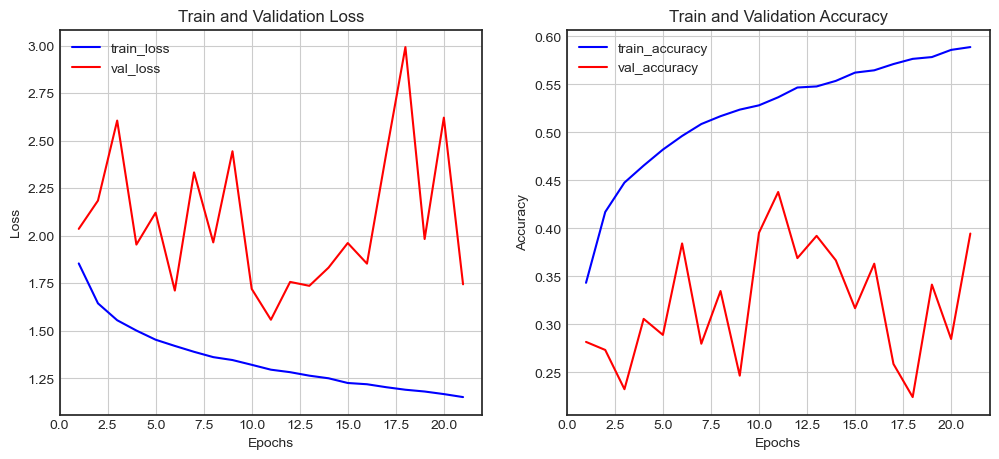

In [54]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()


In [55]:
model.evaluate(x_test, y_test)
# loss: 1.5548 - accuracy: 0.4359

313/313 [==============================] - 1s 2ms/step - loss: 1.5548 - accuracy: 0.4359


[1.5547857284545898, 0.4359000027179718]